Table gives data on Gold prices,   the Consumer Price Index (CPI), and
the New York Stock Exchange (NYSE) Index for the United States for the
period 1977–1991. The NYSE Index includes most of the stocks listed on
the NYSE, some 1500 plus.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm

In [4]:
data = pd.read_csv("eco.csv")
data
# Price of Gold at NewYork $ per ounce
# Consumer Price Index (C.P.I.) 1982-84 = 100
# New York Stock Exchange Index,Dec 31 (1965 = 100)

,Year,GoldPrice,NYSE,CPI
0,1977,147.98,60.60,53.69
1,1978,193.44,65.20,53.70
2,1979,307.62,137.80,58.32
3,1980,612.51,194.30,68.10
4,1981,459.61,256.20,74.02
5,1982,376.01,278.30,68.93
6,1983,423.83,367.78,92.63
7,1984,360.29,380.56,92.46
8,1985,317.30,430.75,108.90
9,1986,367.87,478.90,136.00


### Consumer Price Index -
India-https://www.manifestias.com/2020/05/24/consumer-price-index/

### NYSE Composite index

What Is the NYSE Composite Index?

### The NYSE Composite Index is an index that measures the performance of all stocks listed on the New York Stock Exchange. 
The NYSE Composite Index includes more than 1,900 stocks, of which over 1,500 are U.S. companies.



#### Model 1                                           
Gold Price @t = β1 + β2(C.P.I.@t) + ut

#### Model 2                                            
NYSE index @t = β1 + β2(C.P.I.@t) + ut

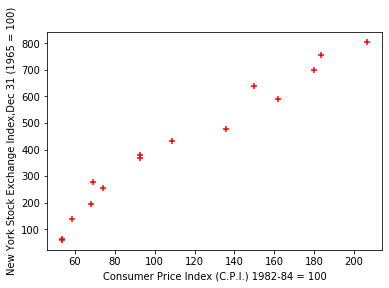

In [5]:
#Scatter Plot
%matplotlib inline
plt.xlabel('Consumer Price Index (C.P.I.) 1982-84 = 100')
plt.ylabel('New York Stock Exchange Index,Dec 31 (1965 = 100)')
plt.scatter(data.CPI,data.NYSE,color='red',marker='+')

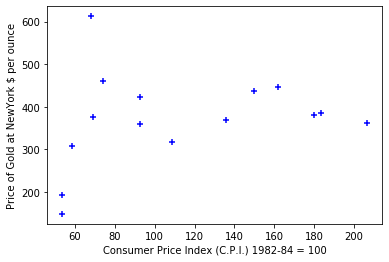

In [6]:
%matplotlib inline
plt.xlabel('Consumer Price Index (C.P.I.) 1982-84 = 100')
plt.ylabel('Price of Gold at NewYork $ per ounce')
plt.scatter(data.CPI,data.GoldPrice,color='blue',marker='+')

### Questions
a. Estimate the two regressions given there, obtaining standard errors
and the other usual output.

b. Test the hypothesis that the disturbances in the two regression models
are normally distributed.

c. In the gold price regression, test the hypothesis that β2 = 1, that is,
there is a one-to-one relationship between gold prices and CPI (i.e., gold
is a perfect hedge).

d. Repeat step c for the NYSE Index regression. Is investment in the
stock market a perfect hedge against inflation? What is the null hypothesis
you are testing? 

e. Between gold and stock, which investment would you choose? What is
the basis of your decision?

In [7]:
#Model 1
X = data['CPI']
Y = data['GoldPrice']
X = sm.add_constant(X)
model1 = sm.OLS(Y,X).fit()
model1.summary()

C:\Users\HP\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              GoldPrice   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                    0.7544
Date:                Tue, 20 Oct 2020   Prob (F-statistic):              0.401
Time:                        02:39:18   Log-Likelihood:                -90.774
No. Observations:                  15   AIC:                             185.5
Df Residuals:                      13   BIC:                             187.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        317.0128     69.241      4.578      0.001     167.426     466.599
CPI            0.4870      0.561      0.869      0.401      -0.724       1.698
==============================================================================
Omnibus:                        3.844   Durbin-Watson:                   0.980
Prob(Omnibus):                  0.146   Jarque-Bera (JB):                1.446
Skew:                           0.525   Prob(JB):                        0.485
Kurtosis:                       4.100   Cond. No.                         300.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
#Model 2
x = data['CPI']
y = data['NYSE']
x = sm.add_constant(x)
model2 = sm.OLS(y,x).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   NYSE   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     307.8
Date:                Tue, 20 Oct 2020   Prob (F-statistic):           1.97e-10
Time:                        02:39:18   Log-Likelihood:                -79.382
No. Observations:                  15   AIC:                             162.8
Df Residuals:                      13   BIC:                             164.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -108.4420     32.400     -3.347      0.005    -178.437     -38.447
CPI            4.6024      0.262     17.543      0.000       4.036       5.169
==============================================================================
Omnibus:                        2.719   Durbin-Watson:                   1.015
Prob(Omnibus):                  0.257   Jarque-Bera (JB):                1.082
Skew:                          -0.057   Prob(JB):                        0.582
Kurtosis:                       1.689   Cond. No.                         300.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### b)  H0 - The data follows the normal distribution
https://www.statisticshowto.com/error-term/

### c) In the gold price regression, test the hypothesis that β2 = 1,
that is, there is a one-to-one relationship between gold prices and CPI (i.e., gold is a perfect hedge)?https://www.investopedia.com/terms/h/hedge.asp

t-critical value = 2.160 @ 13 d.f.

### Claculated Value = (0.4870 - 1)/ .561

                        = -0.91
                        
 Therefore we do not reject the null hypothesis                        

### d) In the NYSE regression testing the hypothesis at  β2 = 1 


### Calculated Value = (4.6024 - 1)/ 0.262
                        = 13.749
 Therefore we reject the null hypothesis                        

### e)  i.e the  estimated coefficent of N.Y.S.E index is greater than 1. 

### For this sample period , investment in the stock market probably is a hedge against inflation.

### It certainly was a much better hedge against inflation than investment in Gold. 